<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#2.1.-Numpy-ndarray---создание" data-toc-modified-id="2.1.-Numpy-ndarray---создание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.1. Numpy ndarray - создание</a></span></li><li><span><a href="#2.2.-Numpy-ndarray---индексы" data-toc-modified-id="2.2.-Numpy-ndarray---индексы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2.2. Numpy ndarray - индексы</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.3.-Numpy-ndarray---элементарные-операции-с-массивами" data-toc-modified-id="2.3.-Numpy-ndarray---элементарные-операции-с-массивами-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2.3. Numpy ndarray - элементарные операции с массивами</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.4.-Numpy---основные-функции." data-toc-modified-id="2.4.-Numpy---основные-функции.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2.4. Numpy - основные функции.</a></span><ul class="toc-item"><li><span><a href="#TLDR:" data-toc-modified-id="TLDR:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TLDR:</a></span></li></ul></li><li><span><a href="#2.5.-Numpy---I/O." data-toc-modified-id="2.5.-Numpy---I/O.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2.5. Numpy - I/O.</a></span></li></ul></div>

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих со статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Shape - кортеж, который указывает число элементов в каждом измерении. 

In [8]:
a = np.array([[1, 2], [3, 4]])

In [9]:
a.size

4

In [10]:
a.shape

(2, 2)

In [11]:
a.dtype

dtype('int32')

In [12]:
a.itemsize

4

In [13]:
a.nbytes

16

При желании, можно использовать np.size(np.object) и np.shape(np.object):

In [14]:
np.size(a)

4

In [15]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [16]:
np.array?

И специальными функциями numpy:

In [17]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

и IPython:

In [18]:
np.con*?

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [19]:
a[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

In [20]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [21]:
np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [22]:
np.array((1,2,3,4), dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

In [23]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [24]:
np.linspace(0, 1, 25)

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [25]:
np.logspace(0, 10, 10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

In [26]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [27]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [28]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

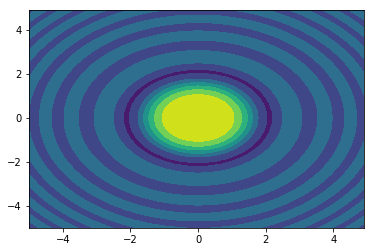

In [32]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [33]:
xx.shape

(1, 100)

In [34]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [37]:
np.random.rand(3,2)

array([[0.50755507, 0.0211933 ],
       [0.43352176, 0.44631306],
       [0.23881999, 0.83024573]])

Нормально распределенные:

In [38]:
np.random.randn(3,2)

array([[ 0.53942869,  1.52676162],
       [-3.2771929 , -1.84856065],
       [ 0.67212494, -1.49297925]])

-- N: иногда полезно получить случайное целое число:

In [41]:
np.random.randint(2,10)

6

In [42]:
np.random.random_integers(2,10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(2, 10 + 1) instead
  """Entry point for launching an IPython kernel.


3

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [43]:
np.random.rand(3,)[1]

0.8840405940159821

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [45]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [46]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [47]:
A = np.random.rand(3,5)

In [48]:
A

array([[0.43940389, 0.62932999, 0.9250581 , 0.35698796, 0.81913345],
       [0.64014279, 0.71505249, 0.73842252, 0.97099961, 0.24604924],
       [0.04258158, 0.24779727, 0.04501664, 0.70546163, 0.83470677]])

In [49]:
A[0,:]

array([0.43940389, 0.62932999, 0.9250581 , 0.35698796, 0.81913345])

In [50]:
A[:,0]

array([0.43940389, 0.64014279, 0.04258158])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [51]:
A[0,:]

array([0.43940389, 0.62932999, 0.9250581 , 0.35698796, 0.81913345])

In [52]:
A[0,:][0:4:2]

array([0.43940389, 0.9250581 ])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [53]:
A[0,:][0:4:2] = [1.0, 2.5]

In [54]:
A

array([[1.        , 0.62932999, 2.5       , 0.35698796, 0.81913345],
       [0.64014279, 0.71505249, 0.73842252, 0.97099961, 0.24604924],
       [0.04258158, 0.24779727, 0.04501664, 0.70546163, 0.83470677]])

Параметры для slicing могут пропускаться:

In [55]:
A[0,:][0:4:2]

array([1. , 2.5])

In [56]:
A[0,:][0:4]

array([1.        , 0.62932999, 2.5       , 0.35698796])

In [57]:
A[0,:][:3]

array([1.        , 0.62932999, 2.5       ])

In [58]:
A[0,:][::-1]

array([0.81913345, 0.35698796, 2.5       , 0.62932999, 1.        ])

In [59]:
A[0,:][-3:]

array([2.5       , 0.35698796, 0.81913345])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [62]:
row_indices = [1, 2]
A[row_indices]

array([[0.64014279, 0.71505249, 0.73842252, 0.97099961, 0.24604924],
       [0.04258158, 0.24779727, 0.04501664, 0.70546163, 0.83470677]])

In [63]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([0.71505249, 0.83470677])

Возможно Булево индексирование (**Boolean indexing**):

In [64]:
B = np.array([n for n in xrange(5)])
row_mask = np.array([True, False, True, False, False])
B[row_mask]

NameError: name 'xrange' is not defined

In [65]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

NameError: name 'B' is not defined

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [66]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [67]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [68]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [69]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [70]:
x[indices]

array([5.5, 6. , 6.5, 7. ])

**take** еще одна конструкция выбора элементов массива:

In [71]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]

In [72]:
v[row_indices]

array([-2,  0,  2])

In [73]:
v.take(row_indices)

array([-2,  0,  2])

In [74]:
np.take(v, row_indices)

array([-2,  0,  2])

** choices ** - полезная функция для выбора элеметов из нескольких массивов:

In [75]:
which = [1, 0, 1, 0]
choices = [[-1,-2,-3,-4], [1,2,3,4]]
np.choose(which, choices)

array([ 1, -2,  3, -4])

** compress ** - альтернативой Булевому индексированию:

In [76]:
a = np.array([[1, 2], [3, 4], [5, 6]])
np.compress([False, True, True], a, axis=0)

array([[3, 4],
       [5, 6]])

## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [77]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [78]:
a * b

array([2., 4., 6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [79]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([2., 4., 6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из оффициальной документации:

In [80]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти операции дадут вам ошибку:

In [81]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [86]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print(x.shape)

print(y.shape)

x + y

(4,)
(5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [87]:
print xx.shape
print y.shape
print (xx + y).shape
print xx + y

print '-------'

print x.shape
print z.shape
print (x + z).shape
print x + z

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(xx.shape)? (<ipython-input-87-76adf4252560>, line 1)

Классный пример из официальной документации:

In [88]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [89]:
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [90]:
a[:, np.newaxis].shape

(4, 1)

** Операции вида "массив - скаляр" **

In [91]:
A

array([[1.        , 0.62932999, 2.5       , 0.35698796, 0.81913345],
       [0.64014279, 0.71505249, 0.73842252, 0.97099961, 0.24604924],
       [0.04258158, 0.24779727, 0.04501664, 0.70546163, 0.83470677]])

In [92]:
A + 2

array([[3.        , 2.62932999, 4.5       , 2.35698796, 2.81913345],
       [2.64014279, 2.71505249, 2.73842252, 2.97099961, 2.24604924],
       [2.04258158, 2.24779727, 2.04501664, 2.70546163, 2.83470677]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [93]:
A * A

array([[1.00000000e+00, 3.96056231e-01, 6.25000000e+00, 1.27440406e-01,
        6.70979604e-01],
       [4.09782791e-01, 5.11300068e-01, 5.45267813e-01, 9.42840248e-01,
        6.05402273e-02],
       [1.81319098e-03, 6.14034888e-02, 2.02649758e-03, 4.97676107e-01,
        6.96735393e-01]])

In [94]:
A / A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

** Матричные операции**

In [95]:
A = np.random.rand(3,3)

In [96]:
np.dot(A,A)

array([[1.06958562, 0.8991354 , 1.30533852],
       [0.38574487, 0.7771932 , 0.91635005],
       [0.47087034, 0.85551238, 1.4903357 ]])

In [99]:
v = np.random.randn(3)
print(v)

[-0.38515053 -1.17214609  1.68059673]


In [100]:
np.dot(A,v)

array([-0.05055178,  1.12533011,  0.47877013])

In [101]:
np.dot(v,v)

4.346672743054385

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [102]:
M = np.matrix(A)

In [103]:
v1 = np.matrix(v).T

In [104]:
M.shape

(3, 3)

In [105]:
v1.shape

(3, 1)

In [106]:
v1.T * v1

matrix([[4.34667274]])

In [107]:
M * v1

matrix([[-0.05055178],
        [ 1.12533011],
        [ 0.47877013]])

** Преобразование массивов**

In [108]:
A.T

array([[0.93413586, 0.26298048, 0.14280278],
       [0.47079336, 0.09889671, 0.80566579],
       [0.51235952, 0.79884636, 0.8795261 ]])

In [109]:
C = np.matrix([[1j, 2j], [3j, 4j]])

In [110]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение:

In [111]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

In [112]:
np.real(C)

matrix([[0., 0.],
        [0., 0.]])

In [113]:
np.imag(C)

matrix([[1., 2.],
        [3., 4.]])

** reshape **

In [114]:
a

array([ 0., 10., 20., 30.])

In [117]:
a = a.reshape((2, 2))

In [118]:
a

array([[ 0., 10.],
       [20., 30.]])

** resize **

In [119]:
a = np.arange(4)

In [120]:
a.resize((8,))

In [121]:
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [122]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [123]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [124]:
a

array([[1, 2],
       [3, 4]])

In [125]:
b = np.array([[5, 6]])

In [126]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [127]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

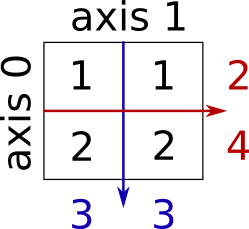

In [128]:
from IPython.display import Image
Image(filename='axis.png')

** hstack **

Название говорит само за себя - horizontal stack.

In [129]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [130]:
a.shape

(2, 2)

In [131]:
b.T.shape

(2, 1)

** vstack **

In [132]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [133]:
a.shape

(2, 2)

In [134]:
b.shape

(1, 2)

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [135]:
A = np.array([[1, 2], [3, 4]])

In [136]:
B = A

In [137]:
B[0,0] = 10

In [138]:
A

array([[10,  2],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [139]:
B = np.copy(A)

In [140]:
B[0,0] = 100

In [141]:
A

array([[10,  2],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [142]:
a = np.arange(10)

In [143]:
b = a[::2]

In [144]:
np.may_share_memory(a, b)

True

In [145]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [146]:
d = a.T
np.may_share_memory(a, d)

True

Как следствие - никогда не делайте так:

In [147]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [148]:
a += a.T

In [149]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [150]:
m = np.random.rand(3,3)

In [151]:
m.sum()

4.805825306164207

In [152]:
m.max()

0.9514400107605424

** Всегда используйте встроенные функции! **

In [153]:
a = np.random.rand(100000)

In [154]:
% timeit -n 1000 max(a)

6.62 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [155]:
% timeit -n 1000 a.max()

44.9 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [156]:
% timeit -n 1000 sum(a)

16.7 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [157]:
% timeit -n 1000 a.sum()

51.3 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [158]:
m

array([[0.6142315 , 0.4373114 , 0.59310375],
       [0.95144001, 0.55312043, 0.90373536],
       [0.13850475, 0.00154376, 0.61283435]])

In [143]:
m.sum(axis=0)

array([ 1.48724046,  1.23555129,  0.90324261])

In [144]:
m.sum(axis=1)

array([ 1.34464472,  1.6141806 ,  0.66720903])

In [145]:
m.max(axis=0)

array([ 0.80017464,  0.50831188,  0.62732854])

Очень полезно произведение всех элементов:

In [146]:
m.prod(axis=1)

array([ 0.01470692,  0.15273469,  0.01086364])

Кумулятивная сумма элементов:

In [147]:
a.cumsum() * 100

array([  4.28987914e+01,   5.57278783e+01,   6.12323077e+01, ...,
         5.00021104e+06,   5.00029323e+06,   5.00029806e+06])

Кумулятивное произведение:

In [148]:
a.cumprod()

array([ 0.42898791,  0.05503523,  0.00302938, ...,  0.        ,
        0.        ,  0.        ])

**Простые статистики**

**Среднее**

In [149]:
m.mean(axis=0)

array([ 0.49574682,  0.41185043,  0.30108087])

In [150]:
np.mean(m, axis=0)

array([ 0.49574682,  0.41185043,  0.30108087])

In [151]:
np.mean(a)

0.50002980624724602

In [152]:
a.mean()

0.50002980624724602

**Медиана**

In [153]:
np.median(m, axis=0)

array([ 0.49251674,  0.49433532,  0.23975588])

In [154]:
np.median(a)

0.49990770202468521

** Дисперсия **

In [155]:
np.std(m, axis=0)

array([ 0.24725615,  0.12666276,  0.24520897])

In [156]:
m.std(axis=0)

array([ 0.24725615,  0.12666276,  0.24520897])

In [157]:
np.var(a)

0.082862615185021971

In [158]:
a.var()

0.082862615185021971

** Сортировка **

In [159]:
np.sort(a)

array([  1.23368564e-07,   8.35574121e-06,   3.31602126e-05, ...,
         9.99981382e-01,   9.99987399e-01,   9.99988258e-01])

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [160]:
a.sort()

In [161]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [162]:
np.argsort(a)

array([71363,  2207, 72193, ..., 73058, 48237, 36920])

In [163]:
np.argmax(a)

36920

In [164]:
np.argmin(a)

71363

In [165]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

** Функции для работы с матрицами **

In [166]:
m

array([[ 0.80017464,  0.50831188,  0.0361582 ],
       [ 0.49251674,  0.49433532,  0.62732854],
       [ 0.19454907,  0.23290409,  0.23975588]])

In [167]:
np.diag(m)

array([ 0.80017464,  0.49433532,  0.23975588])

In [168]:
m.diagonal()

array([ 0.80017464,  0.49433532,  0.23975588])

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [169]:
MM = np.random.randn(9, 6)

In [170]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [171]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [172]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0

In [173]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [174]:
heavyside_vec = np.vectorize(heavyside)

In [175]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [176]:
def heavyside(x):
    return 1 * (x >= 0)

In [177]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [178]:
np.array([-3,-2,-1,0,1,2,3]) >= 0

array([False, False, False,  True,  True,  True,  True], dtype=bool)

In [179]:
1 * (np.array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [180]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

no element in M is larger than 5


In [181]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В данном случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [182]:
np.save("random.npy", M)

In [183]:
np.load("random.npy")

array([[ 0.57932569,  0.54316235,  0.06809414],
       [ 0.37136518,  0.86893099,  0.32802898],
       [ 0.79151818,  0.35584648,  0.73868464]])

In [184]:
np.savetxt('random.csv', M, delimiter='\t')

In [185]:
! cat random.csv

5.793256870583683993e-01	5.431623513920460500e-01	6.809413957674415041e-02
3.713651814215058744e-01	8.689309870993479068e-01	3.280289805153254745e-01
7.915181848452498281e-01	3.558464832929942867e-01	7.386846375389560793e-01


In [186]:
np.loadtxt('random.csv')

array([[ 0.57932569,  0.54316235,  0.06809414],
       [ 0.37136518,  0.86893099,  0.32802898],
       [ 0.79151818,  0.35584648,  0.73868464]])